# Task 9

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Load the dataset
data = np.load('Data/circle_data_1.npy')

# Transpose data and populate
points = data.T
x_points = points[:, 0]
y_points = points[:, 1]

In [61]:
# Construct the A matrix and b vector for least-squares
N = len(points)
A = np.ones((N, 3))
b = np.zeros(N)

for i in range(N):
    x = x_points[i]
    y = y_points[i]
    A[i, 1] = -2 * x
    A[i, 2] = -2 * y
    b[i] = -(x**2 + y**2)

A

array([[ 1.        ,  3.4090711 , -3.47328761],
       [ 1.        ,  2.35568754, -0.52656519],
       [ 1.        ,  1.90098938, -3.35593188],
       [ 1.        ,  2.87709198,  0.09244163],
       [ 1.        ,  3.36759511, -1.2050373 ],
       [ 1.        ,  0.89709409, -2.63991226],
       [ 1.        ,  3.9227909 , -1.64759832],
       [ 1.        ,  3.02538767, -3.52739821],
       [ 1.        ,  0.38155817, -1.69987076],
       [ 1.        ,  0.21226918, -0.4064507 ],
       [ 1.        ,  1.68901941, -3.25482101],
       [ 1.        ,  0.34872947, -4.64367774],
       [ 1.        ,  4.50884682, -0.70654184],
       [ 1.        ,  2.02902995, -0.56832271],
       [ 1.        ,  2.72199301, -2.88228222],
       [ 1.        ,  0.85789716, -3.59870762],
       [ 1.        ,  0.39146927, -0.17144767],
       [ 1.        ,  3.58906069, -1.26331119],
       [ 1.        ,  0.68842332, -2.83901243],
       [ 1.        ,  0.29731161, -2.4221875 ],
       [ 1.        ,  1.41758816, -0.711

LS Center: (-1.0621100344153003, 0.9947560513264783)
LS Radius: 0.9788704078898127


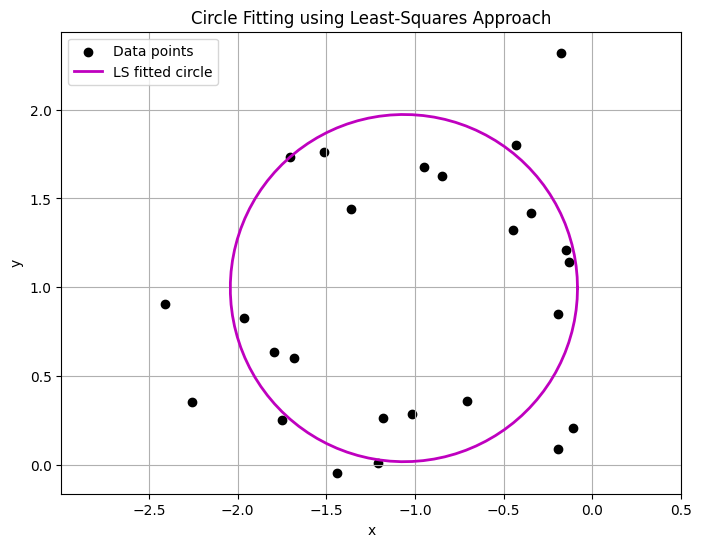

In [62]:
# Solve the least-squares problem
solution, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Extract the solution
y_star = solution[0]
c_ls_x = solution[1]
c_ls_y = solution[2]
c_ls = np.array([c_ls_x, c_ls_y])

# Calculate the radius
R_ls = np.sqrt(np.linalg.norm(c_ls)**2 - y_star)

print(f"LS Center: ({c_ls_x}, {c_ls_y})")
print(f"LS Radius: {R_ls}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, color='black', label='Data points')

# Plot the fitted circle
theta_plot = np.linspace(0, 2*np.pi, 100)
circle_x = c_ls_x + R_ls * np.cos(theta_plot)
circle_y = c_ls_y + R_ls * np.sin(theta_plot)
plt.plot(circle_x, circle_y, 'm-', linewidth=2, label='LS fitted circle')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fitting using Least-Squares Approach')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [63]:
# LEVENBERG-MARQUARDT ALGORITHM 
print("\n=== LEVENBERG-MARQUARDT ALGORITHM ===")

# Initialize parameters for LM
theta = np.array([c_ls_x, c_ls_y, R_ls])  # [c_x, c_y, R]
lambda_val = 1.0
epsilon = 1e-6
max_iter = 100

grad_norms = []
costs = []


=== LEVENBERG-MARQUARDT ALGORITHM ===


In [64]:
for iter in range(max_iter):
    # Compute residuals
    r = np.zeros(N)
    for i in range(N):
        dist = np.linalg.norm(points[i] - theta[:2])
        r[i] = dist - theta[2]
    
    # Compute current cost
    current_cost = np.sum(r**2)
    costs.append(current_cost)
    
    # Compute Jacobian
    J = np.zeros((N, 3))
    for i in range(N):
        dist = np.linalg.norm(points[i] - theta[:2])
        if dist > 1e-12:
            J[i, 0] = (theta[0] - points[i, 0]) / dist  # ∂r/∂c_x
            J[i, 1] = (theta[1] - points[i, 1]) / dist  # ∂r/∂c_y
        J[i, 2] = -1  # ∂r/∂R
    
    # Compute gradient
    gradient = 2 * J.T @ r
    grad_norm = np.linalg.norm(gradient)
    grad_norms.append(grad_norm)
    
    print(f"Iteration {iter+1}: Cost = {current_cost:.6f}, Grad Norm = {grad_norm:.6f}")
    
    # Check convergence
    if grad_norm < epsilon:
        print("Converged!")
        break
    
    # LM update step
    while True:
        # Solve (J^T J + λI) δ = -J^T r
        A_lm = J.T @ J + lambda_val * np.eye(3)
        b_lm = -J.T @ r
        delta = np.linalg.lstsq(A_lm, b_lm, rcond=None)[0]
        
        # Proposed update
        theta_new = theta + delta
        
        # Compute new cost
        new_r = np.zeros(N)
        for i in range(N):
            dist = np.linalg.norm(points[i] - theta_new[:2])
            new_r[i] = dist - theta_new[2]
        new_cost = np.sum(new_r**2)
        
        if new_cost < current_cost:
            # Accept update
            theta = theta_new
            lambda_val = max(lambda_val / 10, 1e-12)
            break
        else:
            # Reject update, increase lambda
            lambda_val = lambda_val * 10
            if lambda_val > 1e12:
                print("Lambda too large, breaking")
                break


Iteration 1: Cost = 1.599213, Grad Norm = 1.898778
Iteration 2: Cost = 1.550781, Grad Norm = 0.100996
Iteration 3: Cost = 1.550584, Grad Norm = 0.002507
Iteration 4: Cost = 1.550584, Grad Norm = 0.000272
Iteration 5: Cost = 1.550584, Grad Norm = 0.000034
Iteration 6: Cost = 1.550584, Grad Norm = 0.000004
Iteration 7: Cost = 1.550584, Grad Norm = 0.000001
Converged!


In [65]:
# Extract LM results
c_lm_x, c_lm_y, R_lm = theta
print(f"\nLM Center: ({c_lm_x:.4f}, {c_lm_y:.4f})")
print(f"LM Radius: {R_lm:.4f}")


LM Center: (-1.0600, 0.9523)
LM Radius: 0.9443


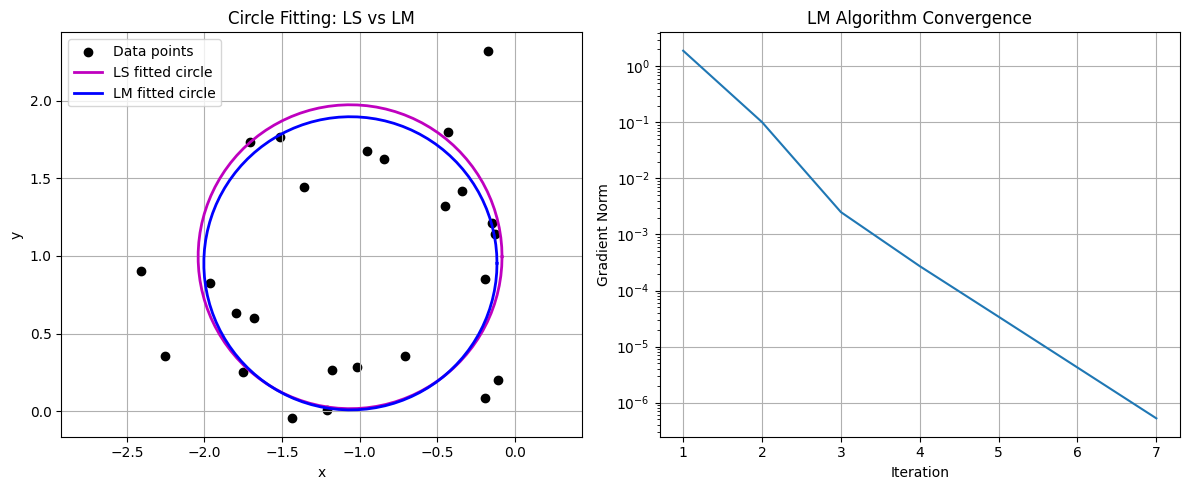

In [66]:
# Plot comparison
plt.figure(figsize=(12, 5))

# Plot 1: Data with both circles
plt.subplot(1, 2, 1)
plt.scatter(x_points, y_points, color='black', label='Data points')

# Plot LS circle
circle_ls_x = c_ls_x + R_ls * np.cos(theta_plot)
circle_ls_y = c_ls_y + R_ls * np.sin(theta_plot)
plt.plot(circle_ls_x, circle_ls_y, 'm-', linewidth=2, label='LS fitted circle')

# Plot LM circle
circle_lm_x = c_lm_x + R_lm * np.cos(theta_plot)
circle_lm_y = c_lm_y + R_lm * np.sin(theta_plot)
plt.plot(circle_lm_x, circle_lm_y, 'b-', linewidth=2, label='LM fitted circle')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fitting: LS vs LM')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Plot 2: Gradient norm across iterations
plt.subplot(1, 2, 2)
plt.semilogy(range(1, len(grad_norms) + 1), grad_norms)
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('LM Algorithm Convergence')
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()